## N.Vamsidhar Reddy       BL.EN.U4AIE21089

Original Audio:


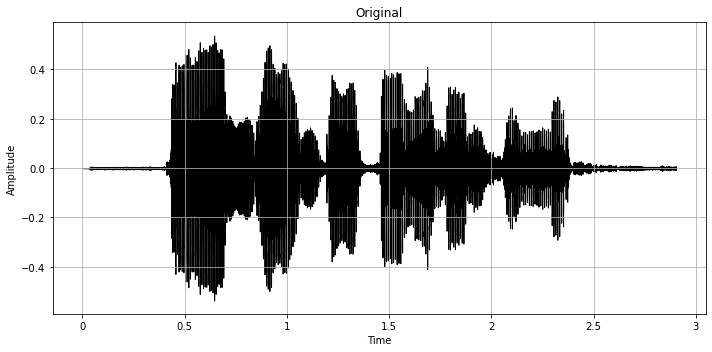

Trimmed Audio:


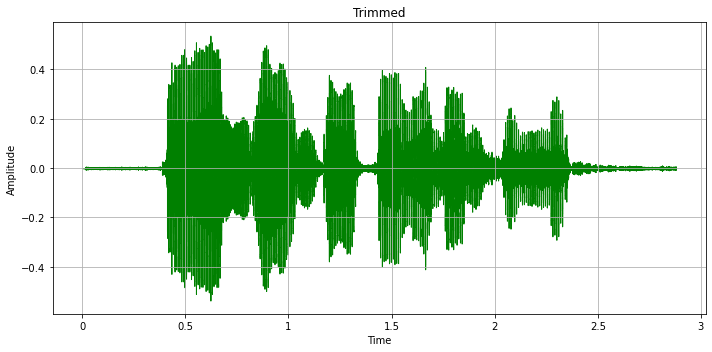

In [9]:
import librosa
import soundfile as sf
import IPython.display as ipd
import matplotlib.pyplot as plt
import numpy as np
import librosa.display

# Load the original audio file
original_waveform, sample_rate_original = librosa.load('Statement.wav', sr=None)
# Trim silence from the beginning and end
trimmed_waveform, index = librosa.effects.trim(original_waveform)
# Write the trimmed audio to a new file
sf.write('trimmed_audio.wav', trimmed_waveform, sample_rate_original)
# Load the trimmed audio file
trimmed, sample_rate_trimmed = librosa.load('trimmed_audio.wav', sr=None)

print("Original Audio:")
# Display the original audio
ipd.display(ipd.Audio(original_waveform, rate=sample_rate_original))

# Plot waveform of the original audio
plt.figure(figsize=(10, 5))
librosa.display.waveshow(original_waveform, sr=sample_rate_original, color='black')
plt.title('Original')
plt.xlabel('Time')
plt.ylabel('Amplitude')
plt.grid(True)
plt.tight_layout()
plt.show()

print("Trimmed Audio:")
# Display the trimmed audio
ipd.display(ipd.Audio(trimmed_waveform, rate=sample_rate_original))

# Plot waveform of the trimmed audio
plt.figure(figsize=(10, 5))
librosa.display.waveshow(trimmed, sr=sample_rate_trimmed, color='green')
plt.title('Trimmed')
plt.xlabel('Time')
plt.ylabel('Amplitude')
plt.grid(True)
plt.tight_layout()
plt.show()


Splitting with silence_threshold_db=1


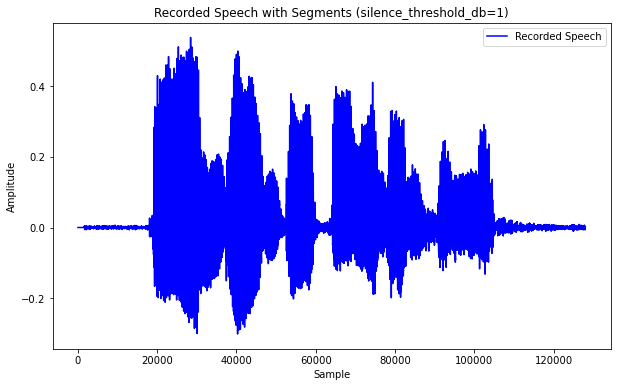

Splitting with silence_threshold_db=10


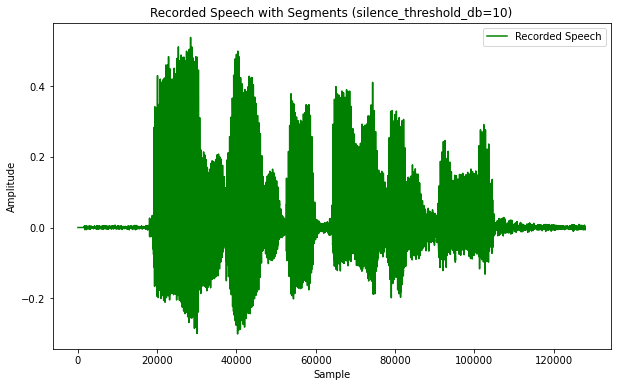

Splitting with silence_threshold_db=20


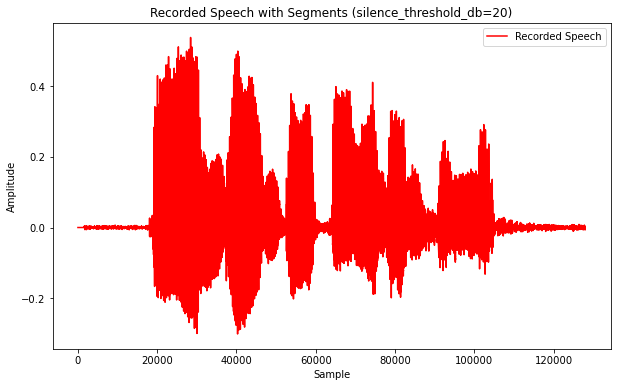

Splitting with silence_threshold_db=40


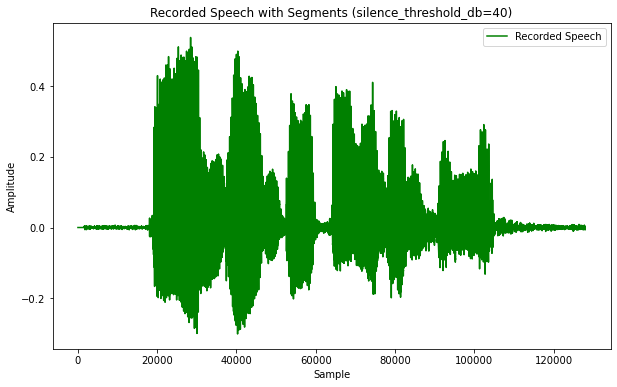

Listening to segments with silence_threshold_db=1:


Listening to segments with silence_threshold_db=10:


Listening to segments with silence_threshold_db=20:


Listening to segments with silence_threshold_db=40:


In [10]:
import librosa
import soundfile as sf
import IPython.display as ipd
import matplotlib.pyplot as plt
import random

# Load the speech waveform
speech_waveform, sample_rate = librosa.load('Statement.wav', sr=None)

def split_and_save(silence_threshold_db):
    # Split the waveform into segments based on the silence threshold
    speech_segments = librosa.effects.split(speech_waveform, top_db=silence_threshold_db)
    color_options = ['blue', 'red', 'green', 'orange']
    plt.figure(figsize=(10, 6))
    plt.plot(speech_waveform, color=random.choice(color_options), label='Recorded Speech')

    for i, segment in enumerate(speech_segments):
        start, end = segment
        segment_waveform = speech_waveform[start:end]
        sf.write(f'segment_{i}.wav', segment_waveform, sample_rate)

    plt.title(f"Recorded Speech with Segments (silence_threshold_db={silence_threshold_db})")
    plt.xlabel('Sample')
    plt.ylabel('Amplitude')
    plt.legend()
    plt.show()

silence_thresholds = [1, 10, 20, 40]

for silence_threshold_db in silence_thresholds:
    print(f"Splitting with silence_threshold_db={silence_threshold_db}")
    split_and_save(silence_threshold_db)

# Listen to the generated segments
for silence_threshold_db in silence_thresholds:
    print(f"Listening to segments with silence_threshold_db={silence_threshold_db}:")
    speech_segments = librosa.effects.split(speech_waveform, top_db=silence_threshold_db)
    for j in range(len(speech_segments)):
        ipd.display(ipd.Audio(f'segment_{j}.wav'))


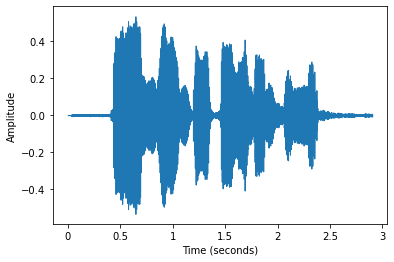

(1025, 126)
80.0


In [11]:
from librosa import display
import numpy as np

audio_waveform, sample_rate = librosa.load("Statement.wav", sr=None)

plt.figure()
librosa.display.waveshow(y=audio_waveform, sr=sample_rate)
plt.xlabel("Time (seconds)")
plt.ylabel("Amplitude")
plt.show()

# Short-Time Fourier Transform (STFT) parameters
n_fft = 2048
stft_matrix = librosa.stft(audio_waveform, n_fft=n_fft, hop_length=n_fft//2)
print(stft_matrix.shape)

# Convert the magnitude of the STFT to decibels
db_spectrum = librosa.amplitude_to_db(np.abs(stft_matrix), ref=np.max)
print(np.max(np.abs(db_spectrum)))


In [12]:
no_mute = librosa.effects.split(signal)
no_mute

array([[  1024, 128000]])

In [13]:
def displayTime(startFrame, endFrame):    
    print(' start time: ' + str(startFrame/sr) + ', end time: ' + str(endFrame/sr))
for i in no_mute:
    displayTime(i[0],i[1])

 start time: 0.023219954648526078, end time: 2.9024943310657596


 start time: 0.023219954648526078, end time: 2.9024943310657596


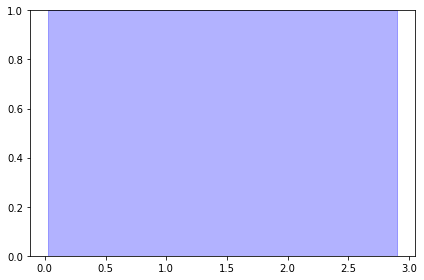

In [15]:
for i, (start, end) in enumerate(no_mute):
    displayTime(start, end)  
    if i % 2 == 0:
        plt.axvspan(start/sample_rate, end/sample_rate, color='blue', alpha=0.3)  
    else:
        plt.axvspan(start/sample_rate, end/sample_rate, color='orange', alpha=0.3)  

plt.tight_layout()
plt.show()


C:\Users\Nvams\AppData\Local\Temp\ipykernel_5804\3530215147.py:7: RuntimeWarning: divide by zero encountered in log10
  waveform_db = 20 * np.log10(np.abs(audio_waveform) / max_amplitude)


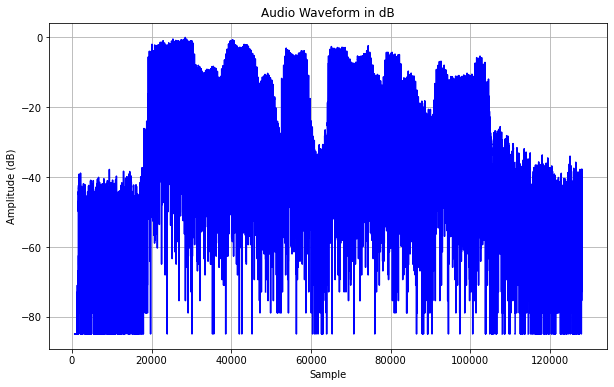

In [16]:
import numpy as np
import matplotlib.pyplot as plt

max_amplitude = np.max(np.abs(audio_waveform))

# Convert amplitude to dB
waveform_db = 20 * np.log10(np.abs(audio_waveform) / max_amplitude)

# Plot the dB representation of the audio waveform
plt.figure(figsize=(10, 6))
plt.plot(waveform_db, color='blue')
plt.xlabel('Sample')
plt.ylabel('Amplitude (dB)')
plt.title('Audio Waveform in dB')
plt.grid(True)
plt.show()
